In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Add the dependency libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.lines as mlines
import os
import numpy as np

In [18]:
def plot_rhodes(MgO_Num='', Fo='') :
    
    # Define the 3 Kd values
    Kd1 = 0.315
    Kd2 = 0.345
    Kd3 = 0.375

    Mg_Fe_Ol = np.arange(1,1000,0.1)
    Mg_Num_Ol = 100*(Mg_Fe_Ol/(Mg_Fe_Ol+1))

    # Calculate equilibrium lines
    Fo_liq_1  = (Mg_Fe_Ol*Kd1)
    Mg_NUM_liq_1 = 100*(Fo_liq_1/(Fo_liq_1+1))

    Fo_liq_2  = (Mg_Fe_Ol*Kd2)
    Mg_NUM_liq_2 = 100*(Fo_liq_2/(Fo_liq_2+1))

    Fo_liq_3  = (Mg_Fe_Ol*Kd3)
    Mg_NUM_liq_3 = 100*(Fo_liq_3/(Fo_liq_3+1))

    fig, ax = plt.subplots()

    #Kd = 0.315
    ax.set_ylabel("Forsterite", fontsize=12)
    ax.set_xlabel("Mg #", fontsize=12)
    ax.plot(Mg_NUM_liq_1, Mg_Num_Ol, "green", label='$K_{d} = 0.315$', linestyle='--')

    #Kd = 0.345
    ax.plot(Mg_NUM_liq_2, Mg_Num_Ol, "green", label='$K_{d} = 0.345$')

    #Kd = 0.375
    ax.plot(Mg_NUM_liq_3, Mg_Num_Ol, "green", label='$K_{d} = 0.375$', linestyle='--')

    #Adjust axis properties

    ax.set_xlim(52.5, 77)
    ax.set_ylim(76, 92)
    ax.set_title('Rhodes Diagram')


    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(1))

    #Legend properties
    legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('lightgrey')

    #Grid lines
    ax.grid(True, which='major', color='k', linestyle='-', linewidth=1)
    ax.grid(True, which='minor', linestyle = '--')
    fig.set_size_inches(7,5)
    fig.set_dpi(100)

    plt.show()

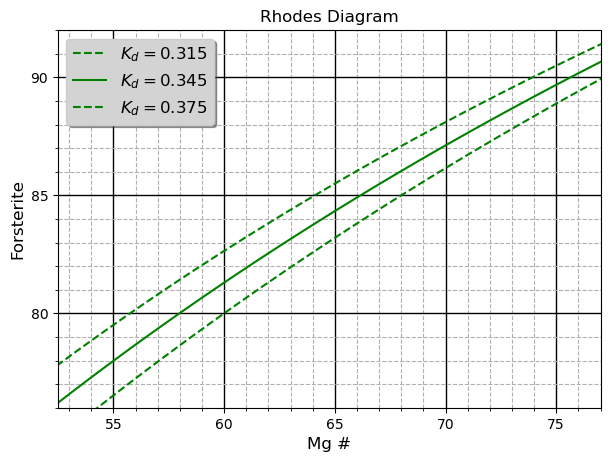

In [19]:
plot_rhodes()

## Data Preprocessing
### Calculate MgO #

In [20]:
#import data
data = os.path.join("..","DATA", "new_data_csv.csv")
df = pd.read_csv(data)

In [21]:
df

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL,SiO2_ol,FeO_ol,MgO_ol,CaO_ol,NiO_ol,MnO_ol,TOTAL_ol,Fo
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,1.10,99.97,38.89,17.50,42.34,0.22,0.29,0.22,99.47,81.18
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,0.26,100.20,40.24,9.11,49.35,0.25,0.42,0.12,99.52,90.62
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,1.44,99.97,40.14,12.40,46.63,0.25,0.37,0.16,99.97,87.02
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,0.26,99.44,39.87,13.27,45.89,0.32,0.31,0.19,99.86,86.04
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,0.91,99.89,40.35,10.17,48.30,0.30,0.35,0.15,99.64,89.44


In [22]:
df['FeO'] = 0.899*df['Fe2O3']

In [23]:
df['MgO_Num'] = 100*((df['FeO']/40.3)/((df['FeO']/40.3)+(df['MgO']/71.85)))

In [24]:
df

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,...,SiO2_ol,FeO_ol,MgO_ol,CaO_ol,NiO_ol,MnO_ol,TOTAL_ol,Fo,FeO,MgO_Num
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,...,38.89,17.50,42.34,0.22,0.29,0.22,99.47,81.18,12.88267,83.647892
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,...,40.24,9.11,49.35,0.25,0.42,0.12,99.52,90.62,11.34538,67.095043
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,...,40.14,12.40,46.63,0.25,0.37,0.16,99.97,87.02,11.51619,72.011752
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,...,39.87,13.27,45.89,0.32,0.31,0.19,99.86,86.04,14.11430,57.082013
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,...,40.35,10.17,48.30,0.30,0.35,0.15,99.64,89.44,12.49610,68.956044


In [145]:
#text[i], (x[i], y[i]
text = df['sample'].tolist()
x = df.MgO_Num.tolist()
y = df.Fo.tolist()
print(text, x ,y)

['EXI504L2 18-1 ', 'EXI504L2 15-3 ', 'EX1504L2-D7-1', 'EXI504L2 11-2 ', 'EX1504L2-D2-4'] [83.64789242358277, 67.09504263700164, 72.01175166491835, 57.08201312160389, 68.95604431578839] [81.18, 90.62, 87.02, 86.04, 89.44]


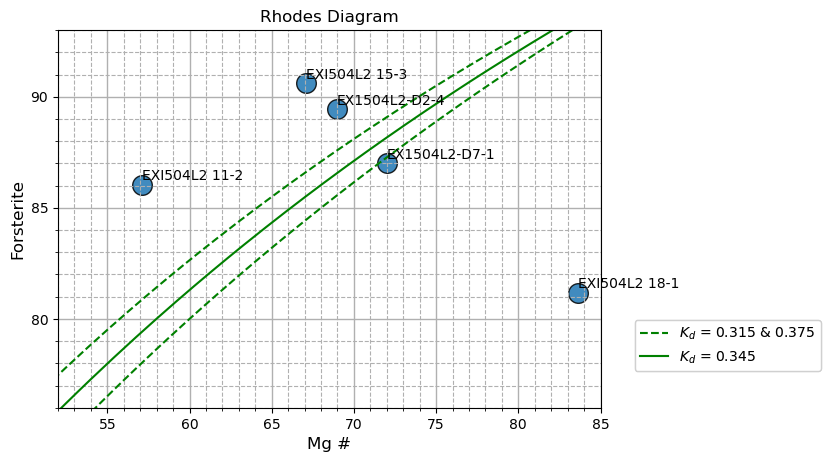

In [146]:
# Define the 3 Kd values
Kd1 = 0.315
Kd2 = 0.345
Kd3 = 0.375

Mg_Fe_Ol = np.arange(1,1000,0.1)
Mg_Num_Ol = 100*(Mg_Fe_Ol/(Mg_Fe_Ol+1))

# Calculate equilibrium lines
Fo_liq_1  = (Mg_Fe_Ol*Kd1)
Mg_NUM_liq_1 = 100*(Fo_liq_1/(Fo_liq_1+1))

Fo_liq_2  = (Mg_Fe_Ol*Kd2)
Mg_NUM_liq_2 = 100*(Fo_liq_2/(Fo_liq_2+1))

Fo_liq_3  = (Mg_Fe_Ol*Kd3)
Mg_NUM_liq_3 = 100*(Fo_liq_3/(Fo_liq_3+1))

fig, ax = plt.subplots()

#Set axis labels
ax.set_ylabel("Forsterite", fontsize=12)
ax.set_xlabel("Mg #", fontsize=12)

#Kd = 0.315
kd1 = ax.plot(Mg_NUM_liq_1, Mg_Num_Ol, "green", label='$K_{d} = 0.315$', linestyle='--')

#Kd = 0.345
kd2 = ax.plot(Mg_NUM_liq_2, Mg_Num_Ol, "green", label='$K_{d} = 0.345$')

#Kd = 0.375
kd3 = ax.plot(Mg_NUM_liq_3, Mg_Num_Ol, "green", label='$K_{d} = 0.375$', linestyle='--')

#Plot data with colors representing the distance from Kilauea
data = ax.scatter(
    df.MgO_Num, 
    df.Fo, 
    s=200, 
    alpha=0.85, 
    edgecolors='k' 
    
)

#Adjust axis properties

ax.set_xlim(52, 85)
ax.set_ylim(76, 93)
ax.set_title('Rhodes Diagram')


ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

#Grid lines
ax.grid(True, which='major', linestyle='-', linewidth=1)
ax.grid(True, which='minor', linestyle = '--')

#Legend properties
# legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
# # Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('lightgrey')

kd_1_3_line = mlines.Line2D([], [], color='green', label='$K_{d}$ = 0.315 & 0.375', linestyle='--')
kd_2_line = mlines.Line2D([], [], color='green', label='$K_{d}$ = 0.345', linestyle='-')

legend = ax.legend(handles=[kd_1_3_line, kd_2_line])
first_legend = ax.legend(
    handles=[kd_1_3_line, kd_2_line], 
    facecolor = 'white', 
    loc='upper left',  
    bbox_to_anchor=(1.05, 0.25) )

plt.gca().add_artist(first_legend)

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] + 0.2))

#handles = [mlines.Line2D([0], [0], marker='o', color='w', 
                  #markerfacecolor=v, label=k, markersize=8, markeredgecolor='k') for k, v in color_dict.items()]

#ax.legend(title='Seamounts', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.show()

In [31]:
df

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,...,SiO2_ol,FeO_ol,MgO_ol,CaO_ol,NiO_ol,MnO_ol,TOTAL_ol,Fo,FeO,MgO_Num
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,...,38.89,17.50,42.34,0.22,0.29,0.22,99.47,81.18,12.88267,83.647892
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,...,40.24,9.11,49.35,0.25,0.42,0.12,99.52,90.62,11.34538,67.095043
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,...,40.14,12.40,46.63,0.25,0.37,0.16,99.97,87.02,11.51619,72.011752
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,...,39.87,13.27,45.89,0.32,0.31,0.19,99.86,86.04,14.11430,57.082013
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,...,40.35,10.17,48.30,0.30,0.35,0.15,99.64,89.44,12.49610,68.956044


#### So we need to use olivine addition on one sample (EX1504L2-D7-1), and olivine subtraction on the remaining samples

##### MATLAB Script for olivine fractionation (removal)
```
%% Jonathan Tree

%This script conducts simple olivine removal by finding the median
%forsterite measured within a sample and subtracting small steps from the
%whole rock composition to obtain the parental magma in equilibrium with
%the highest fosterite measured in that sample
clear all; clc;

sample_name='NIH-F-5A';

workbookFile = 'Olivine_Data/NIH-F-5A';
sheetName='sheet1';
startRow=2;
endRow=27;

[Sample_Number,SiO2_Ol,FeO_Ol,NiO_Ol,MnO_Ol,MgO_Ol,CaO_Ol,Total_Ol,Fo_Ol] = ...
    import_Ol(workbookFile,sheetName,startRow,endRow);

WR = [44.58	1.60 7.86 (0.1*14.33) (0.9*14.33) 0.18 24.02 5.71 0.99 0.10 0.32 99.69];

%%
median_Fo = median(Fo_Ol);
mean_Fo   = mean(Fo_Ol);
mode_Fo   = mode(Fo_Ol);
n         = length(Fo_Ol);


for i= 1:n
    tmp(i) = abs(median_Fo-Fo_Ol(i));
    tmp=tmp';
    [x, idx] = min(tmp); %index of closest value
    closest_Fo = Fo_Ol(idx); %closest Fo
end

display (['The Olivine Forsterite being taken out is ' num2str(closest_Fo)])

Model_OL_SiO2 = SiO2_Ol(idx);
Model_OL_FeO  = FeO_Ol(idx);
Model_OL_NiO  = NiO_Ol(idx);
Model_OL_MnO  = MnO_Ol(idx);
Model_OL_MgO  = MgO_Ol(idx);
Model_OL_CaO  = CaO_Ol(idx);

N_WR        = length(WR);
Model_Magma(1, 1:N_WR) = WR;   

OL_Model_Array = [Model_OL_SiO2 0 0 0 Model_OL_FeO Model_OL_MnO Model_OL_MgO ...
                    Model_OL_CaO 0 0 0 0];

%%

MAX_Fo    = max(Fo_Ol);
display(['The Max Fo to equilibrate with is ' num2str(MAX_Fo)])


Kd1 = 0.315; 


Mg_Fe_Ol   = (1:0.1:1000)';
Mg_NUM_ol  = 100*(Mg_Fe_Ol./(Mg_Fe_Ol+1))';

Mg_Fe_liq_1  = (Mg_Fe_Ol*Kd1)';
Mg_NUM_liq_1 = 100*(Mg_Fe_liq_1./(Mg_Fe_liq_1+1))';
    

for o= 1:length(Mg_NUM_ol)
    Fo_tmp(o) = abs(MAX_Fo-Mg_NUM_ol(o));
    [Fo, idx_Max_Fo] = min(Fo_tmp); %index of closest value
    Target_MG_Num = Mg_NUM_liq_1(idx_Max_Fo); %closest Fo
end

%%
LIMIT = 0.01;
flag = 0;
d_Mg(2) = 5;
j = 2;

while (flag==0) 
    Model_Magma(j, 1:N_WR) = Model_Magma(j-1, 1:N_WR) - 0.0001*OL_Model_Array;
    TOTAL(j) = sum(Model_Magma(j, 1:N_WR-1));
    Model_Magma(j, N_WR) = TOTAL(j);
    Model_Magma(j, 1:N_WR) = 100*(Model_Magma(j, 1:N_WR)./TOTAL(j));
    Model_Magma(j, N_WR) = sum(Model_Magma(j, 1:N_WR-1));
    
        Magma_Mg(j) = Model_Magma(j, 7)/40.31;
        Magma_Fe(j) = Model_Magma(j, 5)/71.85;

        Magma_Mg_Num(j) = (Magma_Mg(j)./(Magma_Mg(j)+Magma_Fe(j)))*100;
        
            
        d_Mg(j) = abs(Magma_Mg_Num(j)-Target_MG_Num);
        
        if d_Mg(j) < LIMIT
            flag = 1;
        elseif d_Mg(j) > LIMIT
            j=j+1;
        end 
      
end  
[Kd_315] = Model_Magma(j, 1:N_WR);
Kd_315 = Kd_315';

%% Find the parental magmas in equilibrium with Kd = 0.345 and 0.375
Kd2 = 0.345;
Mg_Fe_liq_2  = (Mg_Fe_Ol*Kd2)';
Mg_NUM_liq_2 = 100*(Mg_Fe_liq_2./(Mg_Fe_liq_2+1))';

for oo= 1:length(Mg_NUM_ol)
    Fo_tmp(oo) = abs(MAX_Fo-Mg_NUM_ol(oo));
    [Fo, idx_Max_Fo] = min(Fo_tmp); %index of closest value
    Target_MG_Num2 = Mg_NUM_liq_2(idx_Max_Fo); %closest Fo
end

for k= 1:length(Magma_Mg_Num)
    Mg_Num2_tmp(k) = abs(Target_MG_Num2-Magma_Mg_Num(k));
    [Mg_num2, idx_Mg_num2] = min(Mg_Num2_tmp); %index of closest value
    [Kd_345] = Model_Magma(idx_Mg_num2, 1:N_WR); %closest Fo
    Kd_345 = Kd_345';
end

Kd3 = 0.375;
Mg_Fe_liq_3  = (Mg_Fe_Ol*Kd3)';
Mg_NUM_liq_3 = 100*(Mg_Fe_liq_3./(Mg_Fe_liq_3+1))';

for ooo= 1:length(Mg_NUM_ol)
    Fo_tmp(ooo) = abs(MAX_Fo-Mg_NUM_ol(ooo));
    [Fo, idx_Max_Fo] = min(Fo_tmp); %index of closest value
    Target_MG_Num3 = Mg_NUM_liq_3(idx_Max_Fo); %closest Fo
end

for kk= 1:length(Magma_Mg_Num)
    Mg_Num3_tmp(kk) = abs(Target_MG_Num3-Magma_Mg_Num(kk));
    [Mg_num3, idx_Mg_num3] = min(Mg_Num3_tmp); %index of closest value
    [Kd_375] = Model_Magma(idx_Mg_num3, 1:N_WR); %closest Fo
    Kd_375 = Kd_375';
end


%% Display the Results

display (['The target Mg # for equilibrium with Kd=0.315 is ' num2str(Target_MG_Num)]);
display (['The final magma Mg # for Kd=0.315 is ' num2str(Magma_Mg_Num(j))]);

display (['The target Mg # for equilibrium with Kd=0.345 is ' num2str(Target_MG_Num2)]);
display (['The final magma Mg # for Kd=0.345 is ' num2str(Magma_Mg_Num(idx_Mg_num2))]);


display (['The target Mg # for equilibrium with Kd=0.375 is ' num2str(Target_MG_Num3)]);
display (['The final magma Mg # for Kd=0.375 is ' num2str(Magma_Mg_Num(idx_Mg_num3))]);


Oxides={'SiO2'; 'TiO2'; 'Al2O3'; 'Fe2O3'; 'FeO'; 'MnO'; 'MgO'; 'CaO'; 'Na2O'; 'K2O'; 'P2O5'; 'Total'};
Parental_Magamas=table(Kd_315, Kd_345, Kd_375,  'RowNames', Oxides)

writetable (Parental_Magamas, 'Ol_Removal_PM.xlsx', 'WriteRowNames', true, 'Sheet', sample_name);
```

In [38]:
# Get olivine data to be able to calculate the median olivine composition

ol_data = os.path.join("..", "DATA", "ol_data.csv")
ol_df = pd.read_csv(ol_data)

In [39]:
ol_df

,SAMPLE,NUMBER,SiO2,FeO,MgO,CaO,NiO,MnO,TOTAL,Fo
0,D18-1-_001,4.0,38.225500,21.314700,39.615800,0.234812,0.177097,0.262172,99.861400,76.815000
1,D18-1-_001,4.0,38.241300,21.233100,39.669500,0.232845,0.187069,0.262046,99.828400,76.907300
2,D18-1-_001,4.0,38.341700,21.218300,39.649000,0.231325,0.178396,0.261592,99.880300,76.910500
3,NaN,NaN,38.269500,21.255367,39.644767,0.232994,0.180854,0.261937,99.856700,76.877600
4,D18-1-_002,5.0,38.140500,21.158300,39.420000,0.261276,0.162664,0.266945,99.423600,76.857900
...,...,...,...,...,...,...,...,...,...,...
221,NaN,NaN,40.345933,11.274700,47.327067,0.318909,0.316384,0.164569,99.754633,88.211233
222,D2-4_010,63.0,39.676700,14.402500,45.052600,0.303962,0.292398,0.199342,99.952200,84.793400
223,D2-4_010,63.0,39.789800,14.263700,44.938100,0.305096,0.294804,0.197279,99.802200,84.885300
224,D2-4_010,63.0,39.809500,14.262600,44.772500,0.301625,0.306307,0.196228,99.655600,84.838800


In [50]:
ol_df.isna().sum()

SAMPLE    0
NUMBER    0
SiO2      0
FeO       0
MgO       0
CaO       0
NiO       0
MnO       0
TOTAL     0
Fo        0
dtype: int64

In [51]:
ol_df2 = ol_df.dropna(axis=0, thresh=None, subset='SAMPLE', inplace=False)

In [52]:
ol_df2

,SAMPLE,NUMBER,SiO2,FeO,MgO,CaO,NiO,MnO,TOTAL,Fo
0,D18-1-_001,4.0,38.2255,21.3147,39.6158,0.234812,0.177097,0.262172,99.8614,76.8150
1,D18-1-_001,4.0,38.2413,21.2331,39.6695,0.232845,0.187069,0.262046,99.8284,76.9073
2,D18-1-_001,4.0,38.3417,21.2183,39.6490,0.231325,0.178396,0.261592,99.8803,76.9105
4,D18-1-_002,5.0,38.1405,21.1583,39.4200,0.261276,0.162664,0.266945,99.4236,76.8579
5,D18-1-_002,5.0,37.9687,21.3426,39.4751,0.262853,0.159011,0.268533,99.4767,76.7282
...,...,...,...,...,...,...,...,...,...,...
219,D2-4_009,62.0,40.3568,11.3351,47.3802,0.319497,0.315664,0.164143,99.8915,88.1673
220,D2-4_009,62.0,40.4426,11.3049,47.2102,0.318462,0.319299,0.165473,99.7609,88.1576
222,D2-4_010,63.0,39.6767,14.4025,45.0526,0.303962,0.292398,0.199342,99.9522,84.7934
223,D2-4_010,63.0,39.7898,14.2637,44.9381,0.305096,0.294804,0.197279,99.8022,84.8853


In [53]:
ol_df2.isna().sum()

SAMPLE    0
NUMBER    0
SiO2      0
FeO       0
MgO       0
CaO       0
NiO       0
MnO       0
TOTAL     0
Fo        0
dtype: int64

In [55]:
D18_1 = ol_df[ol_df['SAMPLE'].str.contains("D18-1")]

In [59]:
D18_1.describe()

,NUMBER,SiO2,FeO,MgO,CaO,NiO,MnO,TOTAL,Fo
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,9.031250,38.224031,20.436444,39.880959,0.248731,0.199948,0.252573,99.341325,77.632991
std,3.402887,0.837696,1.571242,1.852672,0.025120,0.047179,0.022776,1.154076,2.164343
min,4.000000,34.574300,17.468800,32.603100,0.210961,0.141345,0.213310,93.855700,70.426600
25%,6.000000,38.144700,19.660000,39.237175,0.230993,0.162249,0.232076,99.390975,76.644025
50%,9.000000,38.328800,20.911300,39.659250,0.251479,0.186828,0.262069,99.587450,77.025600
75%,11.250000,38.679775,21.349050,40.806025,0.262708,0.227478,0.271037,99.865300,78.722250
max,15.000000,39.017800,24.404700,42.685400,0.330892,0.301771,0.290808,100.174000,81.219900


In [60]:
D18_1_Avg = D18_1.describe(include='all').loc['mean']

In [61]:
df.columns

Index(['sample', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5', 'TOTAL', 'SiO2_ol', 'FeO_ol', 'MgO_ol', 'CaO_ol',
       'NiO_ol', 'MnO_ol', 'TOTAL_ol', 'Fo', 'FeO', 'MgO_Num'],
      dtype='object')

In [64]:
df_WR = df[['sample', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5', 'TOTAL']]

In [65]:
df_WR

,sample,SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,TOTAL
0,EXI504L2 18-1,45.09,3.59,16.62,14.33,0.13,4.49,10.84,3.11,0.68,1.10,99.97
1,EXI504L2 15-3,48.71,2.34,12.70,12.62,0.16,9.92,10.79,2.20,0.52,0.26,100.20
2,EX1504L2-D7-1,45.35,2.84,13.68,12.81,0.17,7.98,12.95,2.28,0.47,1.44,99.97
3,EXI504L2 11-2,43.57,2.23,8.64,15.70,0.20,18.92,8.14,1.23,0.54,0.26,99.44
4,EX1504L2-D2-4,44.02,3.05,12.20,13.90,0.18,10.03,12.64,2.11,0.86,0.91,99.89


In [121]:
D18_WR = df_WR.iloc[0]

In [122]:
D18_WR

sample    EXI504L2 18-1 
SiO2               45.09
TiO2                3.59
Al2O3              16.62
Fe2O3              14.33
MnO                 0.13
MgO                 4.49
CaO                10.84
Na2O                3.11
K2O                 0.68
P2O5                 1.1
TOTAL              99.97
Name: 0, dtype: object

In [123]:
D18_WR['Fe2O3']

14.33

In [124]:
magma = D18_WR
magma['FeO'] = D18_WR['Fe2O3']*0.1
magma['Fe2O3'] = D18_WR['Fe2O3']*0.9

C:\Users\jonat\AppData\Local\Temp\ipykernel_7876\974927912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magma['FeO'] = D18_WR['Fe2O3']*0.1
C:\Users\jonat\AppData\Local\Temp\ipykernel_7876\974927912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magma['FeO'] = D18_WR['Fe2O3']*0.1
C:\Users\jonat\AppData\Local\Temp\ipykernel_7876\974927912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magma['Fe2O3'] = D18_WR['Fe2O3']*0.9

In [125]:
new_comp_test = pd.Series(magma).drop(['sample', 'TOTAL'])

In [130]:
D18_1_Avg

SAMPLE          NaN
NUMBER      9.03125
SiO2      38.224031
FeO       20.436444
MgO       39.880959
CaO        0.248731
NiO        0.199948
MnO        0.252573
TOTAL     99.341325
Fo        77.632991
Name: mean, dtype: object

In [136]:
magma['SiO2'] = magma['SiO2'] + D18_1_Avg.SiO2*0.001
#magma['TiO2']
#magma['Al2O3']
magma['FeO'] = magma['FeO'] + D18_1_Avg.FeO*0.001
magma['MnO'] = magma['MnO'] + D18_1_Avg.MnO*0.001
magma['MgO'] = magma['MgO'] + D18_1_Avg.MgO*0.001 
magma['CaO'] = magma['CaO'] + D18_1_Avg.CaO*0.001
#magma['Na2O'] 
#magma['K2O']
#magma['P2O5']
new_comp = pd.Series(magma).drop(['sample', 'TOTAL'])
magma['TOTAL'] = sum(new_comp)

C:\Users\jonat\AppData\Local\Temp\ipykernel_7876\4294021461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magma['SiO2'] = magma['SiO2'] + D18_1_Avg.SiO2*0.001
C:\Users\jonat\AppData\Local\Temp\ipykernel_7876\4294021461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  magma['FeO'] = magma['FeO'] + D18_1_Avg.FeO*0.001
C:\Users\jonat\AppData\Local\Temp\ipykernel_7876\4294021461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [132]:
magma

sample    EXI504L2 18-1 
SiO2           45.128224
TiO2                3.59
Al2O3              16.62
Fe2O3             12.897
MnO             0.130253
MgO             4.529881
CaO            10.840249
Na2O                3.11
K2O                 0.68
P2O5                 1.1
TOTAL         100.079043
FeO             1.453436
Name: 0, dtype: object